<style>
h1, h2, h3, h4, h5, h6, legend {
  color:#28a87d;
}
#sidebar h2 {
  background-color: #28a87d;
}
</style>


In [ ]:
knitr::opts_chunk$set(echo = TRUE, warning = FALSE, 
                      fig.showtext = TRUE, retina = 1,
                      fig.width = 9, fig.height = 5)


## Chargement des Packages

Nous allons utiliser une suite de package.  Veuillez exécuter le code suivant. `{ggplot2}` fait partie de la collection de paquets `{tidyverse}`, avec d'autres paquets utiles pour un workflow de science des données comme `{dplyr}`, `{tibble}`, `{tidyr}`, et `{readr}`.


In [1]:
#install.packages("ggplot2")

library("tidyverse")
library("here")
library("forcats")
library("ggdist")
library("ggtext")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /home/plasmatebanab2/datavis_test



---

## Importer les Data

Nous pouvons importer les données avec le package `{readr}`. On peut aussi utiliser la fonction de base `readRDS()`.


In [2]:
library(tidyverse)

genes <- readr::read_rds("./data/data-ddh.Rds")


---

## Explorer les données

Jetons un coup d'œil à l'ensemble des données :


In [4]:
head(genes, 10)



cell_line,lineage,lineage_subtype,gene_symbol,dep_score,med
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
S117,Soft Tissue,Thyroid Sarcoma,PSMA5,-2.579297,-1.620174
SW948,Colorectal,Colorectal Adenocarcinoma,PSMA5,-2.552614,-1.620174
MALME3M,Skin,Melanoma,PSMA5,-2.497284,-1.620174
DETROIT562,Upper Aerodigestive,Upper Aerodigestive Squamous,PSMA5,-2.384249,-1.620174
UHO1,Lymphocyte,Hodgkin Lymphoma,PSMA5,-2.360626,-1.620174
MM1S,Plasma Cell,Multiple Myeloma,PSMA5,-2.316646,-1.620174
SUM52PE,Breast,Breast Carcinoma,PSMA5,-2.292242,-1.620174
SKGI,Uterus,Endometrial Squamous,PSMA5,-2.287803,-1.620174
UMUC7,Urinary Tract,Bladder Carcinoma,PSMA5,-2.217894,-1.620174


**Histoire:** Comparer les différences dans les scores de dépendance (`dep_score`) par gène (`gene_symbol`)
**But:** Indiquer la similarité par le chevauchement des distributions

Nous trions les gènes par leur score de dépendance médian :


In [5]:
genes <- 
  genes %>% 
  dplyr::mutate(gene_symbol = forcats::fct_reorder(gene_symbol, med))

head(genes, 10)


cell_line,lineage,lineage_subtype,gene_symbol,dep_score,med
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>
S117,Soft Tissue,Thyroid Sarcoma,PSMA5,-2.579297,-1.620174
SW948,Colorectal,Colorectal Adenocarcinoma,PSMA5,-2.552614,-1.620174
MALME3M,Skin,Melanoma,PSMA5,-2.497284,-1.620174
DETROIT562,Upper Aerodigestive,Upper Aerodigestive Squamous,PSMA5,-2.384249,-1.620174
UHO1,Lymphocyte,Hodgkin Lymphoma,PSMA5,-2.360626,-1.620174
MM1S,Plasma Cell,Multiple Myeloma,PSMA5,-2.316646,-1.620174
SUM52PE,Breast,Breast Carcinoma,PSMA5,-2.292242,-1.620174
SKGI,Uterus,Endometrial Squamous,PSMA5,-2.287803,-1.620174
UMUC7,Urinary Tract,Bladder Carcinoma,PSMA5,-2.217894,-1.620174


Nous pouvons facilement inspecter les données en traçant tous les scores de dépendance, groupés par gène. 
Comme nous savons déjà qu'il s'agit d'un ensemble de données assez important, nous choisissons `geom_jitter()` au lieu de `geom_point()` et ajoutons un peu de transparence. 
Nous pouvons aussi ajouter rapidement la médiane visuellement en utilisant `stat_summary()` :


Warning message:
“Removed 11 rows containing missing values (geom_segment).”


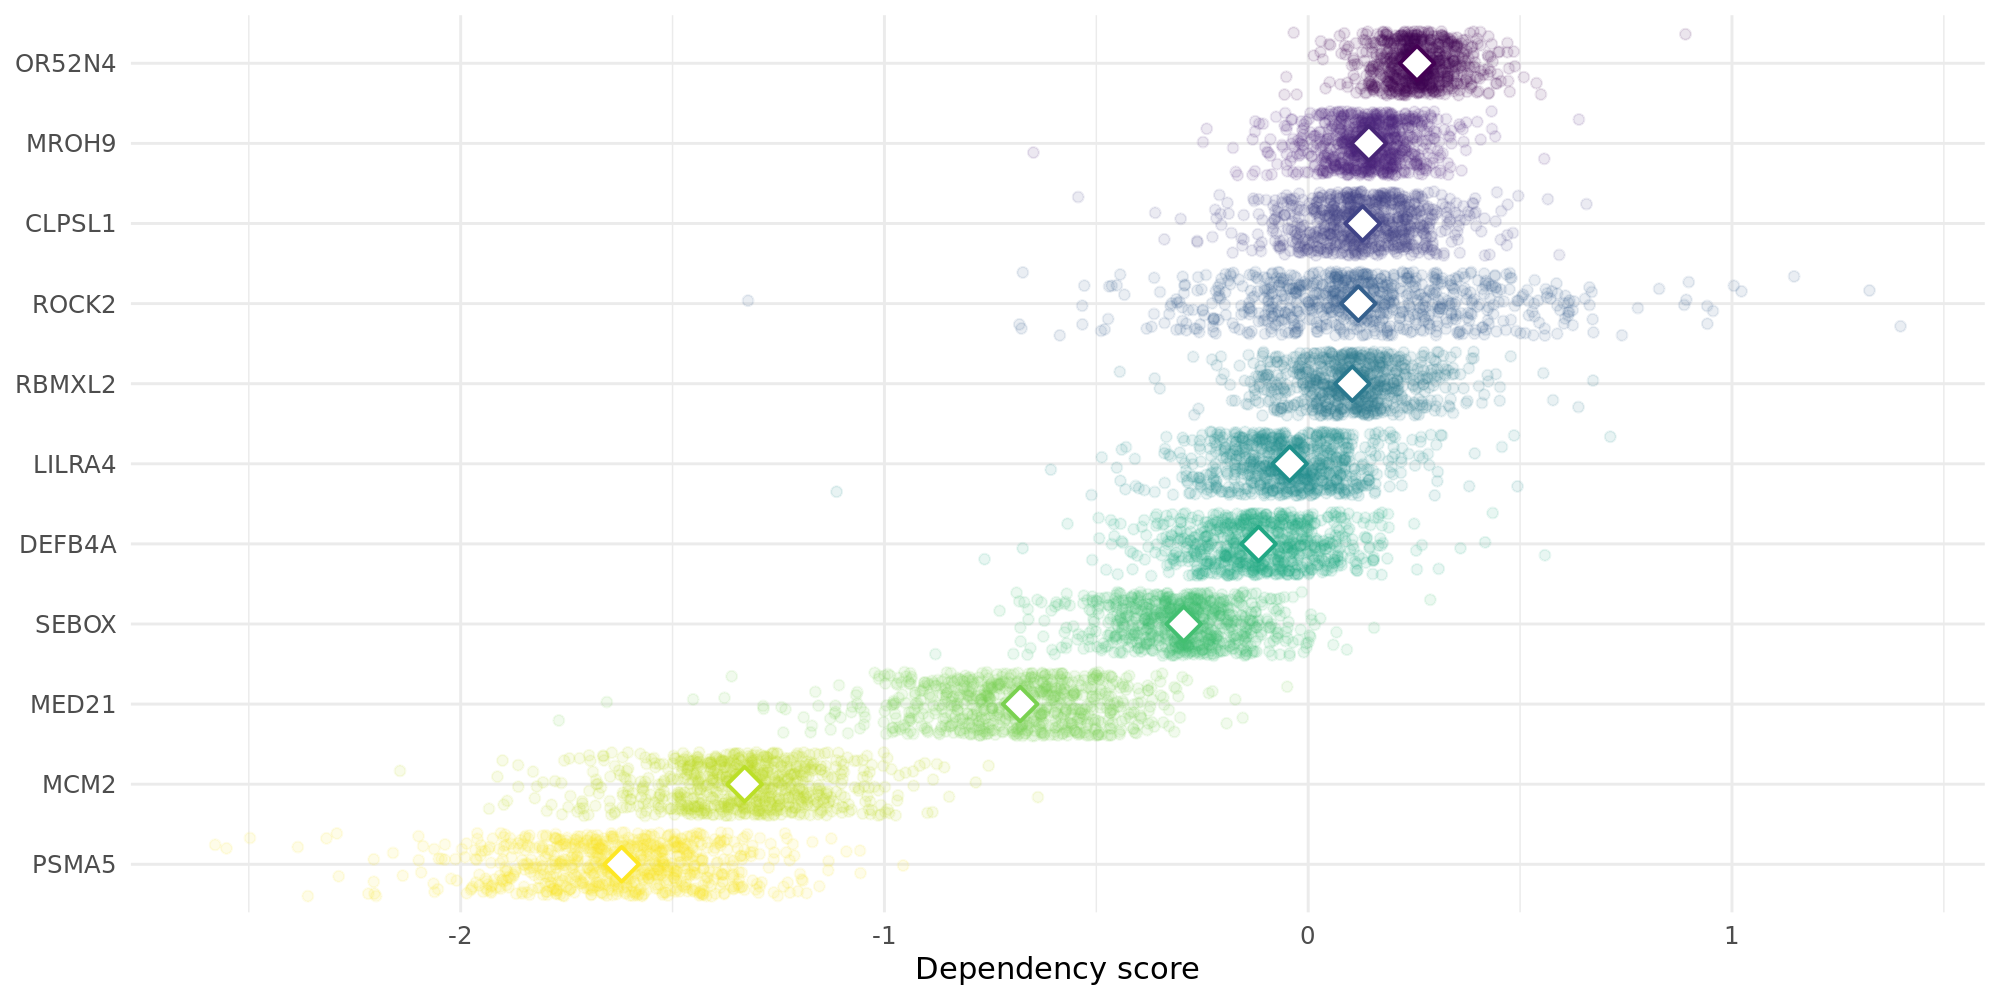

In [21]:
theme_set(theme_minimal())

ggplot(data = genes, 
       aes(x = dep_score, 
           y = gene_symbol,
           color = gene_symbol)) +
  geom_jitter(alpha = .1, show.legend = F) +
  stat_summary(aes(x = dep_score),
               fun = "median",
               shape = 23,
               fill = "white",
               size = 1,
               show.legend = F) +
    scale_color_viridis_d(name = "Gene:", direction = -1) +
    labs(x = "Dependency score", y = NULL) 

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)


---

## Le graphique de densité original

Une façon habituelle de comparer des distributions est un graphique de densité :


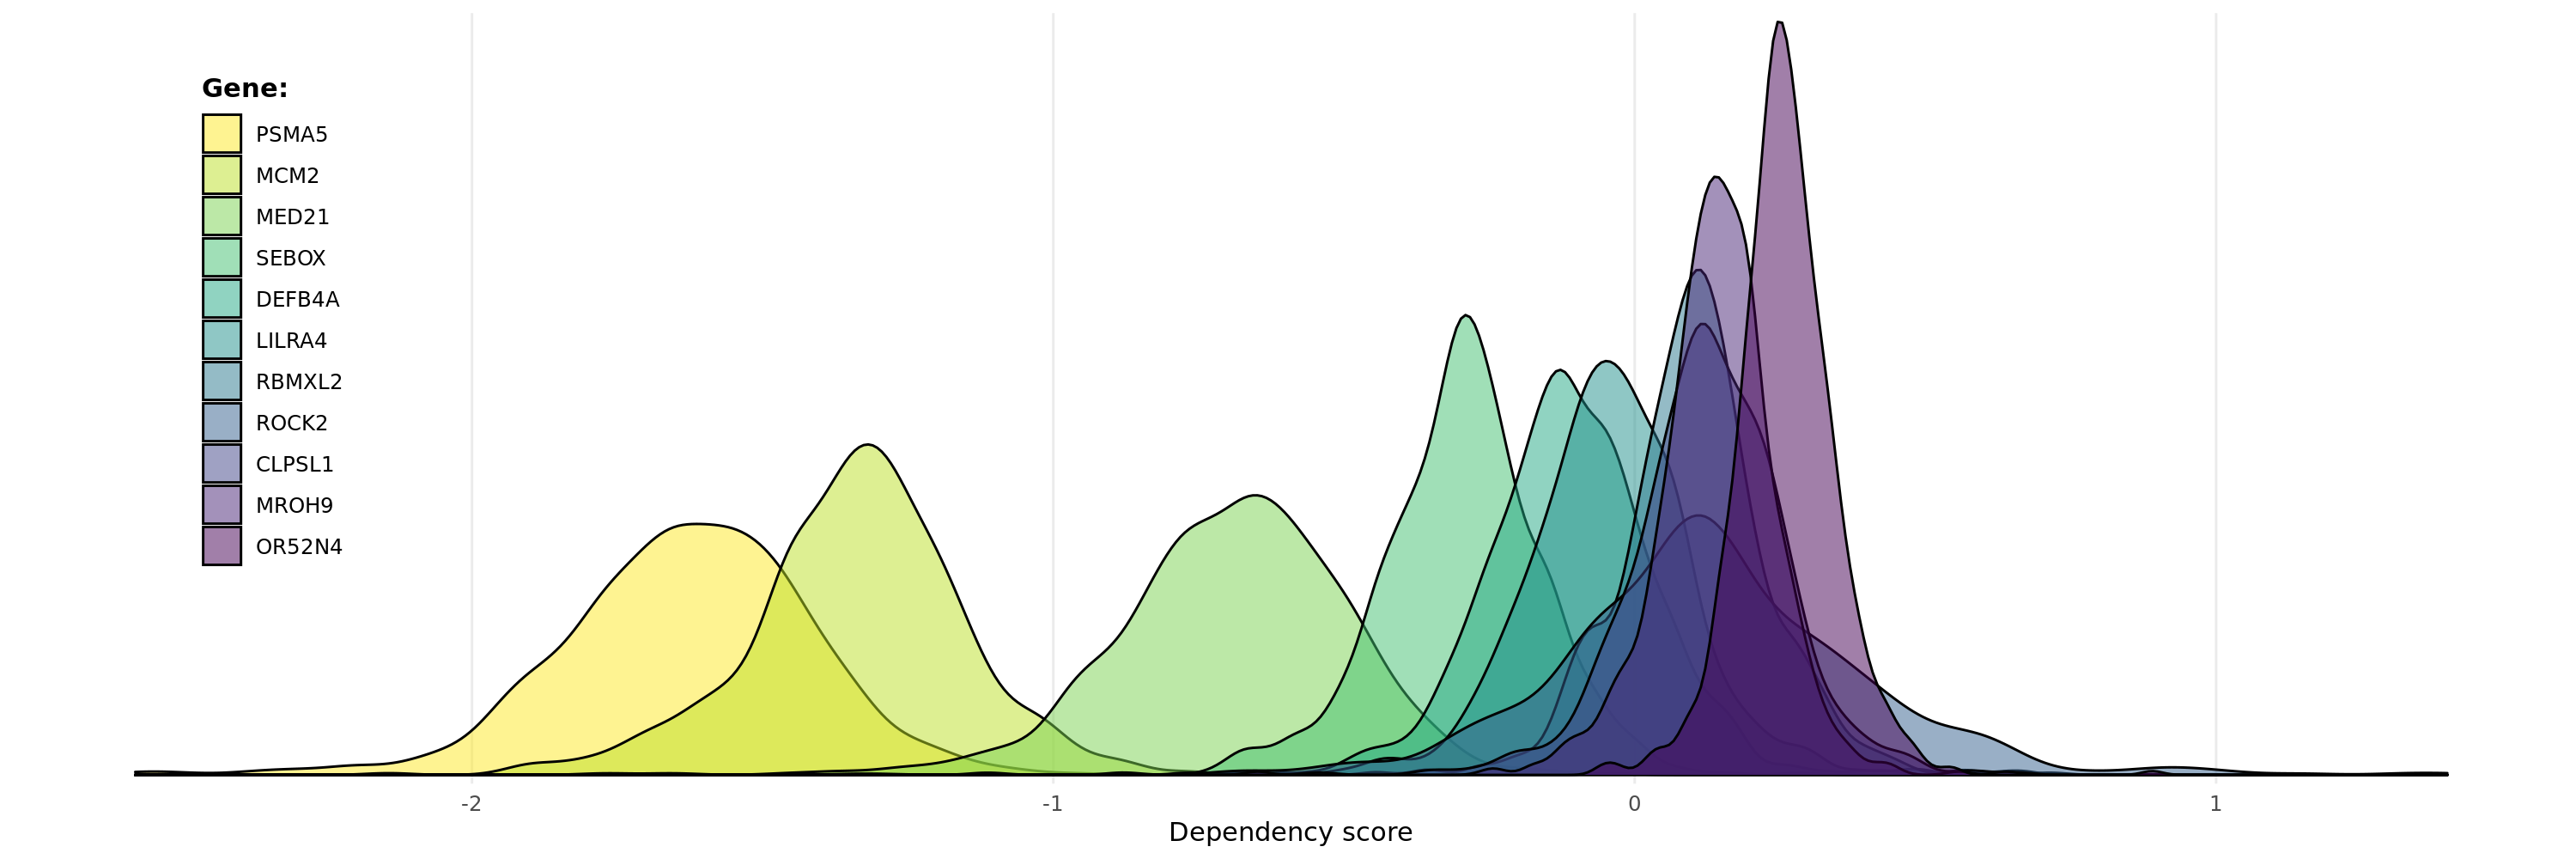

In [29]:

options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 200)


ggplot(data = genes, 
       aes(x = dep_score, 
           fill = gene_symbol)) +
  geom_density(alpha = .5) +
  ## change color palette and name
  scale_fill_viridis_d(name = "Gene:", direction = -1) +
  ## change spacing y axis
  scale_y_continuous(expand = c(.01, .01)) +
  ## add custom text labels
  labs(x = "Dependency score", y = NULL) +
  ## change legend properties and remove axis text
  theme(axis.text.y = element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major.y = element_blank(),
        legend.title = element_text(face = "bold"),
        legend.position = c(.1, .6))



Il y a quelques problèmes avec un nombre croissant de gènes : 
* il devient difficile de voir les distributions individuelles lorsque le nombre de gènes qui se chevauchent est important et que les distributions sont plus similaires.
* Il devient impossible de faire correspondre les couleurs à chaque courbe.


---

## Le plot Ridgeline

Les graphiques de ligne de crête (Ridgeline) montrent la distribution alignée sur la même échelle horizontale mais avec un espacement vertical, souvent présenté avec un léger chevauchement. Le package [`{ggridges}`] (https://cran.r-project.org/web/packages/ggridges/vignettes/introduction.html) est l'outil de choix avec `{ggplot2}` :


In [32]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 200)

ggplot(data = genes, 
       aes(x = dep_score, 
           y = gene_symbol,
           fill = gene_symbol,
           color = after_scale(colorspace::lighten(fill, .3)))) +
  ggridges::geom_density_ridges(alpha = .7) +
  ## change color palette and name
  scale_fill_viridis_d(guide = "none", direction = -1) +
  ## add custom text labels
  labs(x = "Dependency score", y = NULL) 


ERROR: Error in loadNamespace(x): there is no package called ‘ggridges’


On peut améliorer le rendu !



In [9]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 200)

ggplot(data = genes, 
       aes(x = dep_score, 
           y = gene_symbol,
           ## color by dependency score
           fill = med, 
           color = med)) +
  ggridges::geom_density_ridges(alpha = .7) +
  ## change color palette and name
  scale_fill_viridis_c(guide = "none", direction = -1) +
  scale_color_viridis_c(guide = "none", direction = -1) +
  ## change spacing x axis
  scale_x_continuous(expand = c(.01, .01)) +
  ## change spacing y axis
  scale_y_discrete(expand = c(.01, .01)) +
  ## add custom text labels
  labs(x = "Dependency score", y = NULL) +
  ggdark::dark_mode()


ERROR: Error in loadNamespace(x): there is no package called ‘ggridges’


---

## Le tracé en demi-oeil

Le package `{ggdist}` fournit plusieurs géomètries très utiles. Le graphique en demi-oeil qui combine des courbes de densité avec des intervalles montrant la médiane et l'étendue des données :


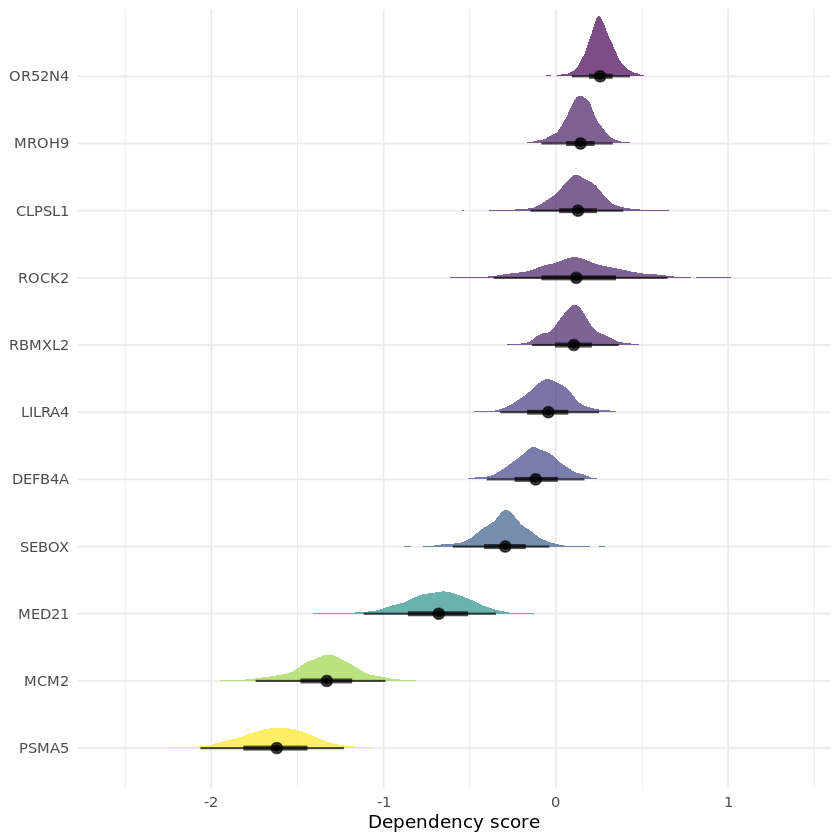

In [10]:
library(ggdist)
# 
ggplot(data = genes, 
       aes(x = dep_score, 
           y = gene_symbol,
           fill = med)) +
  ggdist::stat_halfeye(alpha = .7) +
  ## change color palette and name
  scale_fill_viridis_c(guide = "none", direction = -1) +
  ## add custom text labels
  labs(x = "Dependency score", y = NULL)


La coloration par gène n'apporte pas beaucoup d'informations supplémentaires. En fait, elle pourrait même mettre en évidence certains gènes et en cacher d'autres. Au lieu de cela, nous pouvons également colorer les distributions par des valeurs seuils. Un score de dépendance supérieur à 1 ou inférieur à -1 présente un intérêt particulier, nous l'utilisons donc comme seuil :



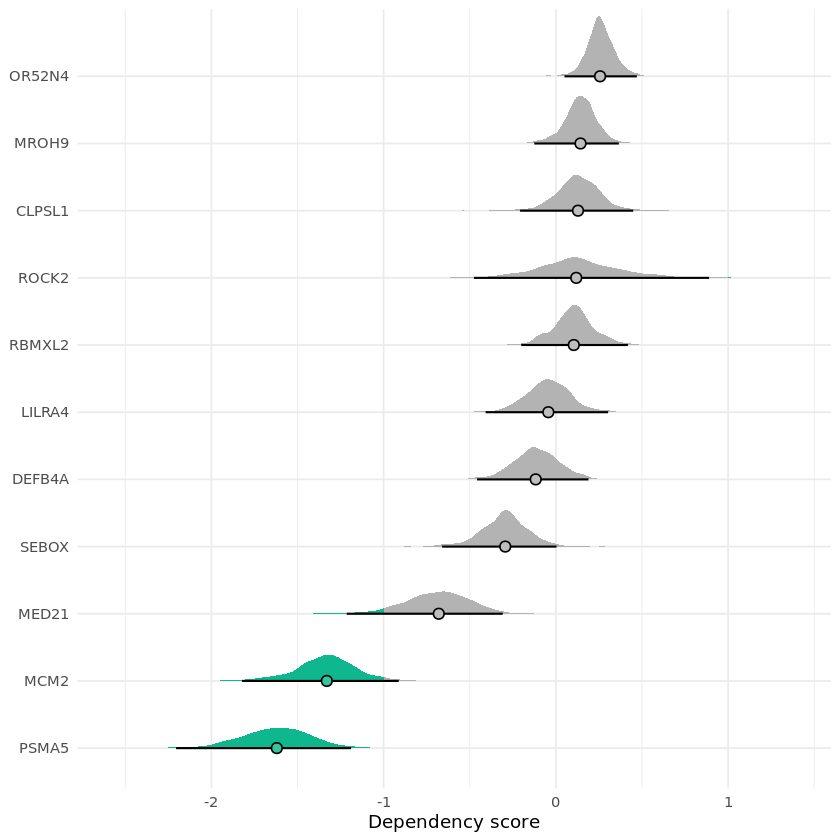

In [11]:
ggplot(data = genes, 
       aes(x = dep_score, 
           y = gene_symbol)) +
  ggdist::stat_halfeye(
    aes(fill = stat(abs(x) > 1),
        point_fill = after_scale(colorspace::lighten(fill, .15))),
    .width = c(.025, .975),
    color = "black",
    shape = 21,
    stroke = .7
  ) +
  ## change color palette and name
  scale_fill_manual(values = c("#b3b3b3", "#0fb78e"), guide = "none") +
  scale_color_manual(values = c("#b3b3b3", "#0fb78e"), guide = "none") +
  ## add custom text labels
  labs(x = "Dependency score", y = NULL)


En appliquant une ombre à la "zone sans intérêt", nous pouvons augmenter l'effet de surbrillance :



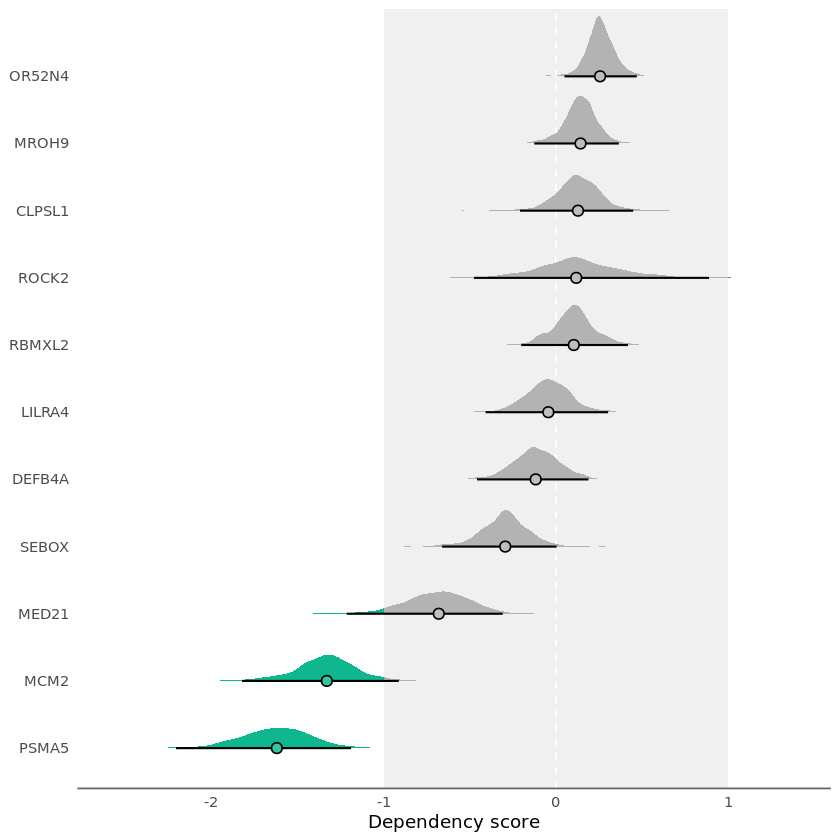

In [12]:
ggplot(data = genes, 
       aes(x = dep_score, 
           y = gene_symbol)) +
  ## add a box to indicate thresholds
  geom_rect(xmin = -1, xmax = 1, 
            ymin = -Inf, ymax = Inf,
            fill = "grey92",
            alpha = 0.1) +
  ## ad line to indicate zero scroes
  geom_vline(xintercept = 0, color = "white", linetype = "dashed") +
  ggdist::stat_halfeye(
    aes(fill = stat(abs(x) > 1),
        point_fill = after_scale(colorspace::lighten(fill, .15))),
    .width = c(.025, .975),
    color = "black",
    shape = 21,
    stroke = .7
  ) +
  ## change color palette and name
  scale_fill_manual(values = c("#b3b3b3", "#0fb78e"), guide = "none") +
  scale_color_manual(values = c("#b3b3b3", "#0fb78e"), guide = "none") +
  ## add custom text labels
  labs(x = "Dependency score", y = NULL) +
  ## remove gridlines and add axis line
  theme(panel.grid = element_blank(),
        axis.line.x = element_line(color = "grey40"))


---

## Le tracé final

Nous pouvons maintenant changer la police de caractères par défaut et ajouter un titre coloré pour expliquer ce que la couleur représente et une légende :


In [13]:
## change default font and gridlines
library(showtext)


ggplot(data = genes, 
       aes(x = dep_score, 
           y = gene_symbol)) +
  ## add a box to indicate thresholds
  geom_rect(xmin = -1, xmax = 1, 
            ymin = -Inf, ymax = Inf,
            fill = "grey92") +
  ## ad line to indicate zero scroes
  geom_vline(xintercept = 0, color = "white", linetype = "dashed") +
  ggdist::stat_halfeye(
    aes(fill = stat(abs(x) > 1),
        point_fill = after_scale(colorspace::lighten(fill, .15))),
    .width = c(.025, .975),
    color = "black",
    shape = 21,
    stroke = .7
  ) +
  ## change color palette and name
  scale_fill_manual(values = c("#b3b3b3", "#0fb78e"), guide = "none") +
  scale_color_manual(values = c("#b3b3b3", "#0fb78e"), guide = "none") +
  ## add custom text labels
  labs(x = "Dependency score", y = NULL,
       title = "<b style='color:#0fb78e'>PSMA5</b> and <b style='color:#0fb78e'>MCM2</b> sont des gènes candidats intéressants avec des scores médians inférieurs à -1",
       caption = "Videz votre moment “Eureka” sur proteinatlas.org et DataDrivenHypothesis.org!") +
  ## remove gridlines, add axis line, adjust title, and add spacing
  theme(panel.grid = element_blank(),
        axis.line.x = element_line(color = "grey40"),
        plot.title = ggtext::element_markdown(margin = margin(b = 10)),
        plot.title.position = "plot",
        plot.caption = element_text(color = "#0fb78e", margin = margin(t = 20)),
        plot.margin = margin(rep(15, 4))) 


ERROR: Error in library(showtext): there is no package called ‘showtext’


<details><summary>Session Info</summary>



In [ ]:
Sys.time()
sessionInfo()



</details>
